**Small Image Classification Using Convolutional Neural Network (CNN)**

In this notebook, we will classify small images (cifar10 dataset) from tensorflow keras datasets. 
<BR>
There are total 10 classes as shown below. We will use CNN for classification

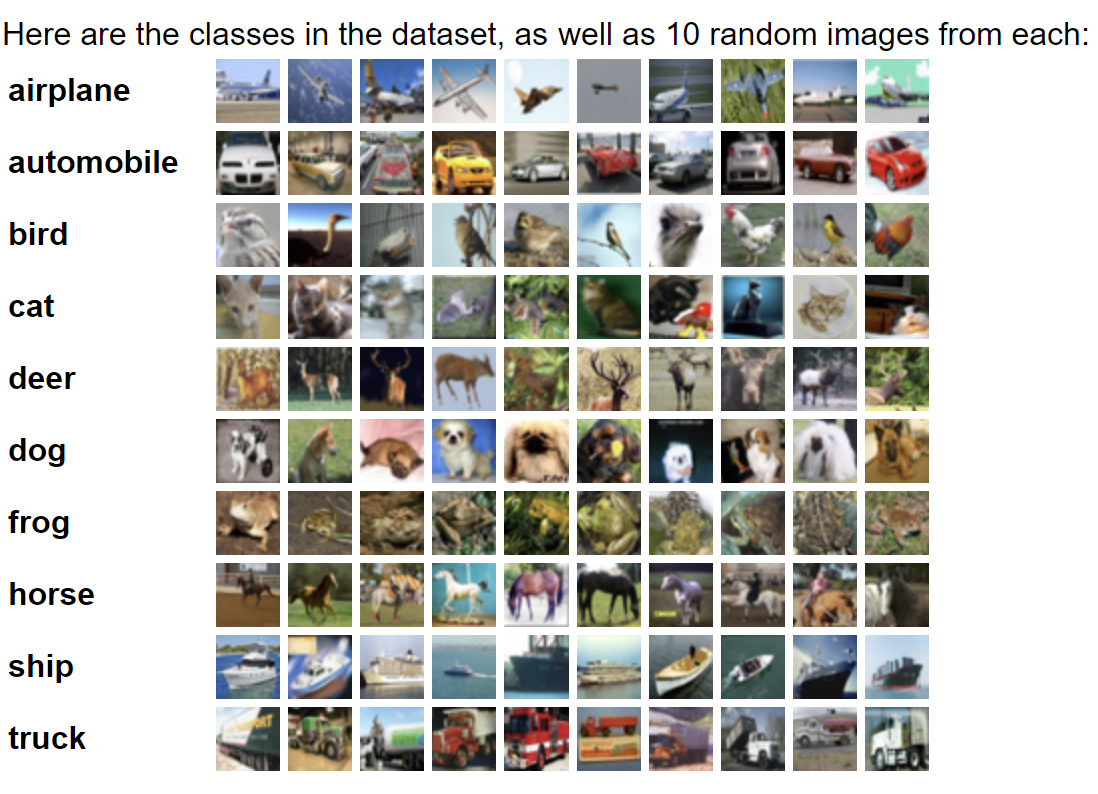

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 111s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

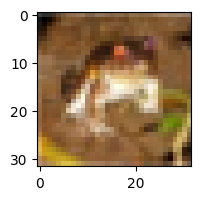

In [6]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [7]:
y_train.shape

(50000, 1)

The y column is the text descripion of the 10 types of images coded as numbers
<br>
0 ="airplane", 1 = "automobile", 2="bird", 3="cat", 4="deer", 5="dog", 6="frog", 7="horse", 8="ship", 9="truck"]

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, 50000 rows and 1 column, in our case we need a 1D array


In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_train.shape

(50000,)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[9]

'truck'

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

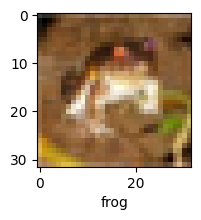

In [15]:
plot_sample(X_train, y_train, 0)

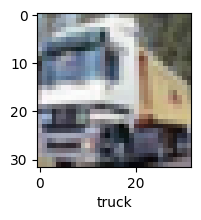

In [16]:
plot_sample(X_train, y_train, 1)

Let's normalize the images to a number from 0 to 1. 
<br>
Each image has 3 channels (R,G,B) and each value in the 32 by 32 channels can range from 0 to 255. 
<br>
Therefore, to normalize the images into a range from 0 to 1, we need to divide each of the pixels in the channels by 255

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Let's first build a simple artificial neural network and see how the model performs

In [20]:
# We will use sparse categorical entropy because the image classes in y_train and y_test are mapped to a range of numbers from 0 to 9
# If the y was either 0 0r 1, we would use categorical entropy instead

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8101 - accuracy: 0.3531
Epoch 2/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6236 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5425 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4824 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 46s 30ms/step - loss: 1.4331 - accuracy: 0.4964


**At the end of 5 epochs, the accuracy is low at around 49%**

In [21]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.5282 - accuracy: 0.4512


[1.5281764268875122, 0.451200008392334]

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.48      0.51      1000
           1       0.68      0.48      0.56      1000
           2       0.50      0.11      0.18      1000
           3       0.27      0.50      0.35      1000
           4       0.53      0.28      0.36      1000
           5       0.37      0.39      0.38      1000
           6       0.44      0.64      0.52      1000
           7       0.61      0.45      0.52      1000
           8       0.40      0.80      0.53      1000
           9       0.63      0.39      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



**Now let us build a convolutional neural network to train our images**
<br>
Let's place the feature extraction layer before the classification layer

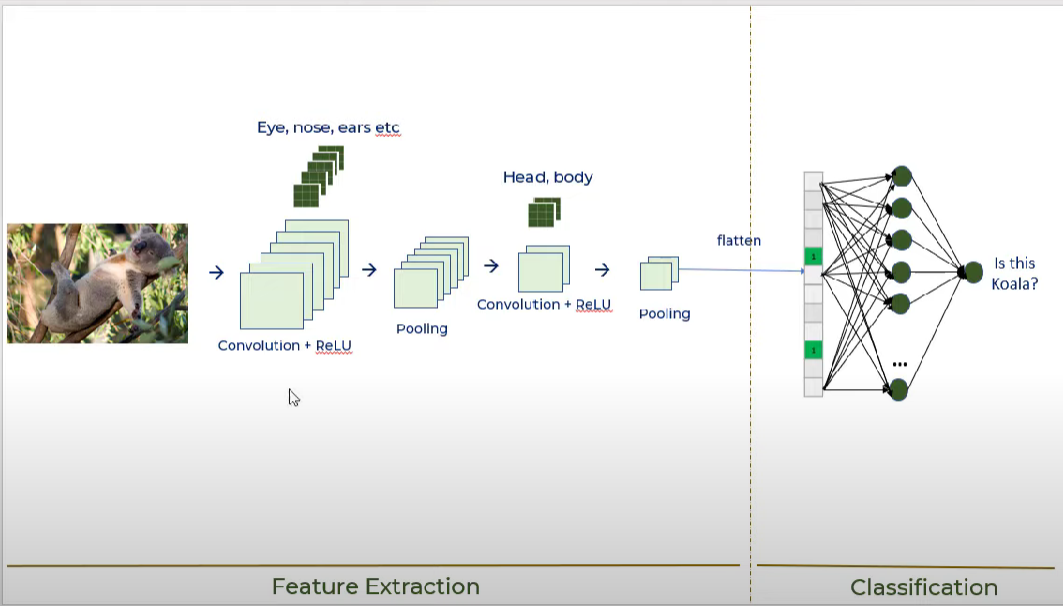

We will use softmax axtivation because it will ensure that the sum of all outputs is 1
<br>
This is necessary because we have 10 different classes so the if the output for class 8 is 0.78 and that is the highest the image is a ship
<br>
Below is an explainer of the softmax on 2 outputs

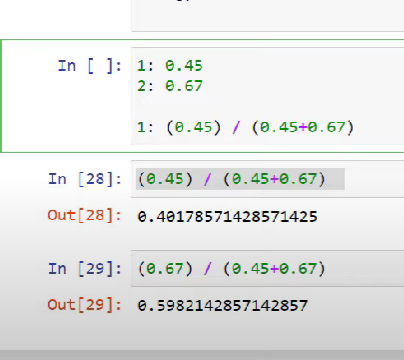

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4768 - accuracy: 0.4684
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1096 - accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9742 - accuracy: 0.6630
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8883 - accuracy: 0.6901
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8273 - accuracy: 0.7131
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7733 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7265 - accuracy: 0.7489
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6889 - accuracy: 0.7604
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6479 - accuracy: 0.7754
Epoch 10/10
1563/1563 [==============================] - 49s 31m

**At the end of 5 epochs, the accuracy is 71%, better than ann - 49%**
<br>
CNN's are better for image classification, also computation is less compared to simple ANN because maxpooling reduces the image dimensions while still preserving the features.

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8922 - accuracy: 0.7092


[0.892208993434906, 0.7092000246047974]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

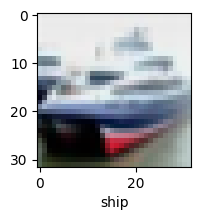

In [28]:
plot_sample(X_test,y_test,1)

Let's use the model and see if it can predict that the first sample is a ship

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[3.74184060e-03, 1.28189835e-03, 6.73475815e-03, 6.39341474e-01,
        1.62173174e-02, 1.31013036e-01, 4.17669155e-02, 8.62940564e-04,
        1.58402652e-01, 6.37267774e-04],
       [5.20184962e-03, 9.18591022e-03, 7.31722866e-06, 3.54036388e-07,
        9.54489394e-08, 2.53045762e-08, 2.49148773e-08, 2.22669865e-08,
        9.85276401e-01, 3.27964080e-04],
       [6.61133006e-02, 1.15037054e-01, 2.56252056e-03, 2.30528112e-03,
        2.37681248e-04, 1.84977514e-04, 3.53702198e-04, 8.34431965e-04,
        8.05669963e-01, 6.70117373e-03],
       [9.67847466e-01, 4.22311062e-03, 1.52783059e-02, 3.11017327e-04,
        3.70014925e-03, 3.99073557e-04, 1.02575601e-03, 7.01742174e-05,
        6.41253404e-03, 7.32430082e-04],
       [1.00891661e-07, 4.24449740e-04, 5.32977432e-02, 1.11670392e-02,
        4.67078894e-01, 9.14640725e-04, 4.66994256e-01, 1.12513835e-05,
        1.05346517e-04, 6.26609017e-06]], dtype=float32)

In [31]:
# np.argmax will show which position/index contains the highest value, start counting at 0
np.argmax([5,3,174,2,1])

2

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

The cnn model got the first 4 images right and the 5th image wrong

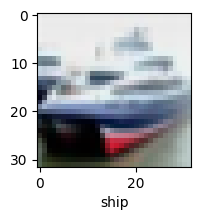

In [41]:
plot_sample(X_test,y_test,1)

In [42]:
classes[y_classes[1]]

'ship'

In [43]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1000
           1       0.86      0.79      0.82      1000
           2       0.59      0.60      0.60      1000
           3       0.54      0.46      0.50      1000
           4       0.66      0.67      0.67      1000
           5       0.57      0.66      0.61      1000
           6       0.76      0.79      0.77      1000
           7       0.74      0.79      0.76      1000
           8       0.81      0.82      0.81      1000
           9       0.81      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [45]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_classes))

Confusion Matrix: 
 [[752  13  54  20  21  16  10  11  76  27]
 [ 27 786   9  13   3   9  15   4  34 100]
 [ 61   5 602  41  91  82  60  38  14   6]
 [ 20   9  73 456  77 233  61  47  15   9]
 [ 16   1  81  49 673  45  51  68  14   2]
 [ 13   3  66 131  40 656  18  63   5   5]
 [  5   5  65  50  43  28 785   8   5   6]
 [ 13   2  35  35  56  58   5 789   2   5]
 [ 55  29  18  18   5  11  11  10 816  27]
 [ 31  60  10  25  10  18  12  27  30 777]]
